In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pdp
import warnings
warnings.filterwarnings('ignore')

## 一、数据获取

In [2]:
## 数据获取student数据
student_data = pd.read_csv("student_data_python1.csv",encoding='utf_8')
student_data.head()

,主键,作业平均分,出生年,城市,工作年限,性别,提交必做作业总数,首次上课日期,最后上课日期,注册日期,...,行业,购买付费课数量,区域特征,是否互联网行业,年平均购买付费课程数,课平均作业提交数,是否有工作经验,优秀学员率,首次上课距离注册日期的天数,流失天数
0,1,0.000000,1992.0,北京市,1.0,男,0.0,2019-01-02,2020-03-03,2016-12-23,...,互联网,2,北京市,是,1.65,0.00,是,0.00,740,985
1,2,5.606061,1992.0,北京市,3.0,男,33.0,2018-04-20,2020-02-25,2018-04-10,...,教育,7,北京市,否,3.65,4.71,是,0.43,10,992
2,3,5.950000,1900.0,成都市,2.0,男,20.0,2018-06-25,2020-03-11,2018-01-29,...,互联网,6,西部,是,3.45,3.33,是,0.17,147,977
3,4,0.000000,1959.0,NaN,3.0,男,2.0,2019-02-27,2019-03-27,2019-02-05,...,我自己填,1,NaN,否,0.94,2.00,是,0.00,22,1327
4,5,3.000000,1961.0,荆门市,0.0,男,1.0,2019-03-21,2019-04-10,2019-02-21,...,制造业,1,中部,否,1.00,1.00,否,0.00,28,1313


In [3]:
## 理解数据字段特征
profile = pdp.ProfileReport(student_data, title='Pandas Profiling Report', html={'style':{'full_width':True}}, minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
## 查看每列的数据类型
student_data.dtypes

主键             int64
作业平均分        float64
出生年            int64
城市            object
工作年限           int64
性别            object
提交必做作业总数     float64
首次上课日期        object
最后上课日期        object
注册日期          object
续费课程的次数        int64
获得优秀学员的次数      int64
行业            object
购买付费课数量        int64
区域特征列         object
dtype: object

In [5]:
## 判断每列是否存在空值
student_data.isnull().any()

主键           False
作业平均分         True
出生年          False
城市           False
工作年限         False
性别           False
提交必做作业总数      True
首次上课日期       False
最后上课日期       False
注册日期         False
续费课程的次数      False
获得优秀学员的次数    False
行业           False
购买付费课数量      False
区域特征列        False
dtype: bool

### 通过观察数据特征和每列数据类型，需进行以下数据处理：
1.出生年密集出现在2014-2019或等于0，用中位数填补；

2.部分学员付费课参与次数为0但提交过必做作业，用中位数填补；

3.作业平均分、提交必做作业总数存在空值，用0来填补；

4.大部分学员都是互联网，新增一列特征列“是否互联网行业”；

5.学员获得优秀学员次数数<购买付费课数量，不符合规律，删除这部分数据；

6.首次上课日期、最后上课日期、注册日期，数据类型转换为date

## 二、数据清理

#### 1.出生年密集出现在2014-2019或等于0，用中位数填补；

In [6]:
## copy一份源数据，使用新dataframe进行下面操作
student_data1 = student_data.copy()
## 对大于或等于2014年的出生年的值，用中位数填补
student_data1.loc[student_data1.出生年>=2014,'出生年'] = student_data['出生年'].median()
## 对等于0年的出生年的值，用中位数填补
student_data1.loc[student_data1.出生年==0,'出生年'] = student_data['出生年'].median()
## 将出生年的数据类型转为Int
student_data1['出生年'] = student_data1['出生年'].astype("int")

In [7]:
## 判断是否还存出生年等于0的数据
student_data1[student_data1['出生年']==0]

,主键,作业平均分,出生年,城市,工作年限,性别,提交必做作业总数,首次上课日期,最后上课日期,注册日期,续费课程的次数,获得优秀学员的次数,行业,购买付费课数量,区域特征列


In [8]:
## 判断是否还存出生年大于等于2014的数据
student_data1[student_data1['出生年']>=2014]

,主键,作业平均分,出生年,城市,工作年限,性别,提交必做作业总数,首次上课日期,最后上课日期,注册日期,续费课程的次数,获得优秀学员的次数,行业,购买付费课数量,区域特征列


#### 2.部分学员付费课参与次数为0但提交过必做作业，用中位数填补;

In [9]:
student_data1.loc[(student_data1['购买付费课数量']==0)&(student_data1['提交必做作业总数']>0),'购买付费课数量'] = student_data['购买付费课数量'].median()

#### 3.作业平均分、提交必做作业总数存在空值，用0来填补；

In [10]:
## 对两列数据存在空值，用0来填补，并在原来数据修改
student_data1['作业平均分'].fillna(0,inplace=True)
student_data1['提交必做作业总数'].fillna(0,inplace=True)
student_data1[['作业平均分','提交必做作业总数']]

,作业平均分,提交必做作业总数
0,0.000000,0.0
1,5.606061,33.0
2,5.950000,20.0
3,3.000000,1.0
4,0.000000,0.0
...,...,...
10937,6.444444,9.0
10938,4.857143,7.0
10939,4.800000,5.0
10940,6.285714,14.0


#### 4.大部分学员都是互联网，新增一列特征列“是否互联网行业”

In [11]:
## 创建方法，判断是否为互联网行业
def function(a,b):
    if (a==b):
        return "是"
    else:
        return "否"
student_data1['是否互联网行业'] = student_data1.apply(lambda x: function(x['行业'],"互联网"),axis=1)

#### 5.学员获得优秀学员次数数<=购买付费课数量，不符合此规律，删除这部分数据；

In [12]:
student_data1.drop(student_data1[student_data1['获得优秀学员的次数']>student_data1['购买付费课数量']].index,
                   axis=0,inplace=True)

#### 6.首次上课日期、最后上课日期、注册日期，数据类型转换为date

In [13]:
student_data1['首次上课日期'] = pd.to_datetime(student_data1['首次上课日期'],format='%Y/%m/%d')
student_data1['最后上课日期'] = pd.to_datetime(student_data1['最后上课日期'],format='%Y/%m/%d')
student_data1['注册日期'] = pd.to_datetime(student_data1['注册日期'],format='%Y/%m/%d')
student_data1

,主键,作业平均分,出生年,城市,工作年限,性别,提交必做作业总数,首次上课日期,最后上课日期,注册日期,续费课程的次数,获得优秀学员的次数,行业,购买付费课数量,区域特征列,是否互联网行业
0,1,0.000000,1992,北京市,1,男,0.0,2019-01-02,2020-03-03,2016-12-23,0,0,互联网,2.0,北京市,是
1,2,5.606061,1992,北京市,3,男,33.0,2018-04-20,2020-02-25,2018-04-10,10,3,教育,7.0,北京市,否
2,3,5.950000,1900,成都市,2,男,20.0,2018-06-25,2020-03-11,2018-01-29,1,1,互联网,6.0,西部,是
3,5,3.000000,1961,荆门市,0,男,1.0,2019-03-21,2019-04-10,2019-02-21,1,0,制造业,1.0,中部,否
4,6,0.000000,1963,乐山市,1,男,0.0,2018-09-27,2018-09-27,2018-09-27,0,0,互联网,1.0,西部,是
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10937,11401,6.444444,1997,上海市,1,未知,9.0,2018-10-08,2020-01-29,2018-04-06,2,0,互联网,6.0,上海市,是
10938,11402,4.857143,2008,天津市,1,未知,7.0,2018-05-14,2019-12-08,2018-03-30,0,0,互联网,5.0,东部,是
10939,11403,4.800000,1992,北京市,3,未知,5.0,2018-08-06,2020-03-12,2018-05-29,0,0,互联网,5.0,北京市,是
10940,11404,6.285714,1992,杭州市,2,未知,14.0,2018-09-12,2020-03-17,2016-03-01,0,0,互联网,11.0,杭州市,是


## 三、数据转换
1、新增指标：年平均购买付费课程数=365X（购买付费课数量/首次上课时间到2020-3-20的天数）

2、新增指标：课平均作业提交数=提交必做作业总数/购买付费课数量

3、新增指标：是否有工作经验

4、新增指标：优秀学员率=获得优秀学员的次数/购买付费课数量

5、新增指标：首次上课距离注册日期的天数

6、新增指标：流失天数（最后上课日期距离今天的天数）

#### 1、新增指标：年平均购买付费课程数=365X（购买付费课数量/首次上课时间到2020-3-20的天数）

In [14]:
## 计算首次上课到2020-3-20的天数
course_first_days = (pd.to_datetime('2020-03-20',format='%Y/%m/%d')-student_data1['首次上课日期']).dt.days
## 最终计算获得年平均购买付费课程数
student_data1['年平均购买付费课程数'] = ((student_data1['购买付费课数量']/course_first_days)*365).round(2)

#### 2.新增指标：课平均作业提交数=提交必做作业总数/购买付费课数量

In [15]:
student_data1['课平均作业提交数'] = (student_data1['提交必做作业总数']/student_data1['购买付费课数量']).round(2)

#### 3、新增指标：是否有工作经验

In [16]:
## 创建方法，判断工作经验是否大于0，大于0为有经验，否则为无经验
def function2(a):
    if (a>0):
        return "是"
    elif(a==0):
        return "否"
    else:
        return "未知"
student_data1['是否有工作经验'] = student_data1.apply(lambda x: function2(x['工作年限']),axis=1)

#### 4、新增指标：优秀学员率=获得优秀学员的次数/购买付费课数量

In [17]:
student_data1['优秀学员率'] = (student_data1['获得优秀学员的次数']/student_data1['购买付费课数量']).round(2)

#### 5、新增指标：首次上课距离注册日期的天数

In [18]:
student_data1['首次上课距离注册日期的天数'] = (student_data1['首次上课日期']-student_data1['注册日期']).dt.days

#### 6、新增指标：流失天数（最后上课日期距离今天的天数）

In [19]:
student_data1['流失天数'] = (pd.datetime.now()-student_data1['最后上课日期']).dt.days
student_data1.to_csv("student_data_python1.csv")

## 四、数据探索

1.不同性别的学习情况如何

2.不同工作年限的学习情况如何，以及有无工作经验的学习情况如何

3.不同所属行业的学习情况如何

4.用户首次上课日期距离出生年的年数的分布情况

5.不同年平均购买付费课程数的人数分布情况

6.不同优秀学员率的人数分布情况

7.不同付费周期（首次上课距离注册日期的天数）的付费情况

8.重点付费用户与是否互联网行业、工作年限的热力图

9.流失天数与区域特征列，优秀学员率的热力图

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font',family='Arial Unicode MS')

#### 1.不同性别的学习情况如何

In [21]:
## 用groupby，对性别进行分组，计算相关数据列的平均值
student_data2 = student_data1.copy()
student_data2.groupby(by='性别')['提交必做作业总数','作业平均分','购买付费课数量','年平均购买付费课程数','课平均作业提交数','优秀学员率'].mean()


,提交必做作业总数,作业平均分,购买付费课数量,年平均购买付费课程数,课平均作业提交数,优秀学员率
性别,,,,,,
女,10.562340,4.775292,3.273657,2.426125,4.272949,0.124345
未知,14.863636,3.283036,6.419192,3.517828,2.372374,0.045707
男,12.153623,4.652850,3.389075,2.338876,4.569443,0.133775


Text(0.5, 1.0, '不同的性别学员人数占比')

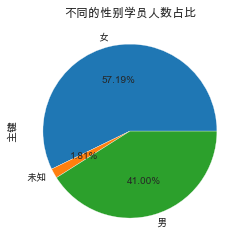

In [22]:
## 对性别分组的数据，进行饼图制作
sex_data = student_data2.groupby(by='性别')['主键'].count()
fig,axes = plt.subplots()
sex_data.plot(kind='pie',ax=axes,autopct='%.2f%%')
axes.set_aspect('equal') # 设置饼图的纵横比相等
axes.set_title('不同的性别学员人数占比')

探索：女生学员的人数要比男生多16.19%，总体上男生的课平均作业提交数和优秀学员率要比女生稍高，体现男生比女生的积极性稍高，而且成为优秀学员的潜力更大一些；而女生的作业平均分、年平均购买付费课程数要比男生稍高，体现女生单个作业的优秀程度、付费力度比男生强

#### 2.不同工作年限的学习情况如何，以及有无工作经验的学习情况如何

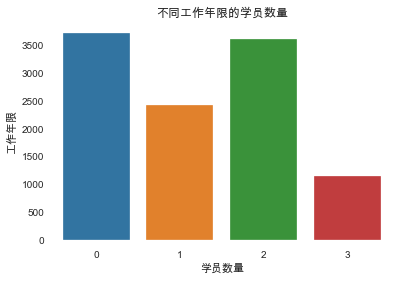

In [23]:
## 对不同工作年限进行柱形图制作，统计每个工作年限的学员数量
work_years = student_data2['工作年限'].value_counts()
sns.barplot(work_years.index,work_years.values)
plt.title('不同工作年限的学员数量')
plt.xlabel('学员数量')
plt.ylabel('工作年限')
plt.show()

Text(0.5, 1.0, '是否有工作经验')

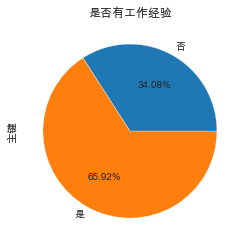

In [24]:
## 对是否有工作经验分组的数据，进行饼图制作
work_years_persent = student_data2.groupby(by='是否有工作经验')['主键'].count()
fig,axes = plt.subplots()
work_years_persent.plot(kind='pie',ax=axes,autopct='%.2f%%')
axes.set_aspect('equal') # 设置饼图的纵横比相等
axes.set_title('是否有工作经验')

In [25]:
## 用groupby，对工作年限进行分组，计算相关数据列的平均值
student_data2.groupby(by='工作年限')['提交必做作业总数','作业平均分','购买付费课数量','年平均购买付费课程数','课平均作业提交数','优秀学员率'].mean()

,提交必做作业总数,作业平均分,购买付费课数量,年平均购买付费课程数,课平均作业提交数,优秀学员率
工作年限,,,,,,
0,8.857296,4.936633,2.387876,1.952047,5.021754,0.142766
1,11.477329,4.758947,3.527617,2.561805,4.340697,0.128054
2,13.001655,4.508619,3.969655,2.638905,3.946486,0.113021
3,13.392241,4.396194,4.397414,2.850026,3.566905,0.115810


In [26]:
## 用groupby，对是否有工作经验进行分组，计算相关数据列的平均值
student_data2.groupby(by='是否有工作经验')['提交必做作业总数','作业平均分','购买付费课数量','年平均购买付费课程数','课平均作业提交数','优秀学员率'].mean()

,提交必做作业总数,作业平均分,购买付费课数量,年平均购买付费课程数,课平均作业提交数,优秀学员率
是否有工作经验,,,,,,
否,8.857296,4.936633,2.387876,1.952047,5.021754,0.142766
是,12.551657,4.574751,3.889752,2.646928,4.018049,0.118527


探索：有工作经验的学员数要比无经验的多，无经验学员数最多，其次是1年和2年工作经验；无经验学员优秀率、作业平均分、课平均作业提交数要比有经验的多，随着工作年限的增大，这3大指标也逐渐降低，体现课程难度随着工作年限增大，也逐渐增大，从而影响这3指标

#### 3.用户首次上课日期距离出生年的年数的分布情况

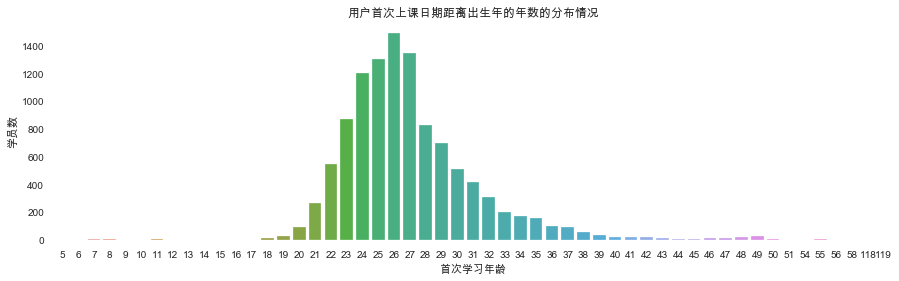

In [27]:
## 对首次学习年龄进行柱形图分布呈现，观察每首次学习年龄的学员数量
student_df = student_data2.copy()
student_df['首次学习年龄'] = student_data2['首次上课日期'].dt.year-student_data2['出生年']
stu_age = student_df['首次学习年龄'].value_counts()
plt.figure(figsize=(15,4))
sns.barplot(stu_age.index,stu_age.values)
plt.title('用户首次上课日期距离出生年的年数的分布情况')
plt.xlabel('首次学习年龄')
plt.ylabel('学员数')
plt.show()

探索：整体分布状态呈正态分布，大部分学员首次付费学习年龄集中在（23，29）岁之间

#### 4.不同优秀学员率的人数分布情况

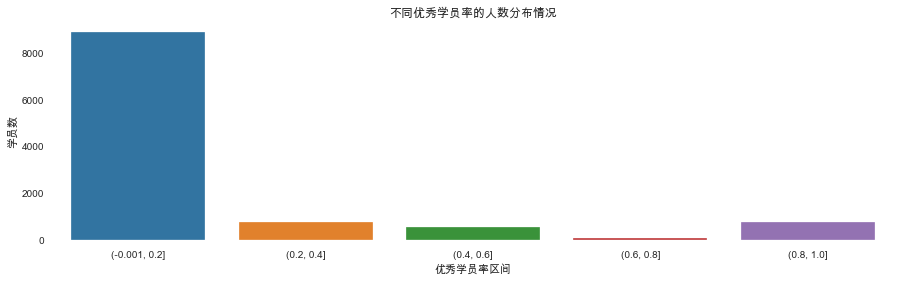

In [28]:
## 对优秀学员率进行切分区间，分成5组，并使用柱形图进行图形呈现
excellent_number = pd.cut(student_data2['优秀学员率'],5)
excellent_number = excellent_number.value_counts()
plt.figure(figsize=(15,4))
sns.barplot(excellent_number.index,excellent_number.values)
plt.title('不同优秀学员率的人数分布情况')
plt.xlabel('优秀学员率区间')
plt.ylabel('学员数')
plt.show()

探索：大部分学员集中在优秀率区间为[0,0.2]之间，[0.6,0.8]的数量最少

#### 5.不同付费周期（首次上课距离注册日期的天数）的付费情况

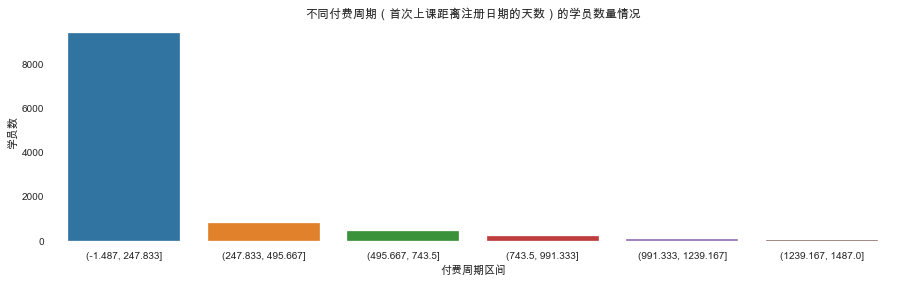

In [29]:
## 对付费周期进行切分区间，分成6组，并使用柱形图进行图形呈现
payment_cycle = pd.cut(student_data2['首次上课距离注册日期的天数'],6)
payment_cycle = payment_cycle.value_counts()
plt.figure(figsize=(15,4))
sns.barplot(payment_cycle.index,payment_cycle.values)
plt.title('不同付费周期（首次上课距离注册日期的天数）的学员数量情况')
plt.xlabel('付费周期区间')
plt.ylabel('学员数')
plt.show()

探索：大部分学员的付费周期（首次上课距离注册日期的天数）在[0，248]之间

#### 6.重点付费用户与是否互联网行业、工作年限的热力图

In [30]:
student_data2['年平均购买付费课程数'].mean()

2.4101133558826326

In [31]:
## 总体的年平均购买付费课程数为2.41，取整为3
def function3(a):
    if (a>=3):
        return "是"
    else:
        return "否"
## 创建新的一列重点付费用户，大于或等于3为是，否则为否
student_data2['重点付费用户'] = student_data2.apply(lambda x: function3(x['年平均购买付费课程数']),axis=1)
stu_payment = student_data2[student_data2['重点付费用户']=='是']
stu_internet = stu_payment['是否互联网行业']
stu_work_year = stu_payment['工作年限']
## 呈现透视表
pivot_df = pd.DataFrame({'工作年限':stu_work_year,'是否互联网行业':stu_internet,'count':1})
pivot_tbl = pivot_df.pivot_table(index = ['是否互联网行业'],columns = ['工作年限'],values=['count'], aggfunc=[np.sum])
pivot_tbl

sum               
        count               
工作年限        0    1    2    3
是否互联网行业                     
否         297  215  330  118
是         295  414  674  247

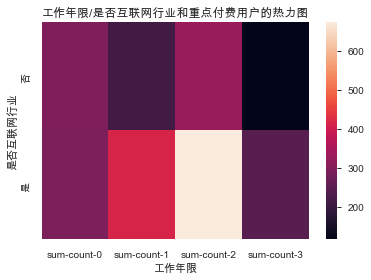

In [32]:
# 呈现热力图
sns.heatmap(pivot_tbl)
plt.xlabel('工作年限')
plt.ylabel('是否互联网行业')
plt.title('工作年限/是否互联网行业和重点付费用户的热力图')
plt.show()

探索：互联网行业及2年工作经验的重点付费用户最多，而不是互联网行业及3年工作经验的重点付费用户最少

#### 7.流失天数较严重的用户与区域特征列，优秀学员率的热力图

In [33]:
student_data2['流失天数'].mean()

302.05292988390164

In [34]:
## 总体的平均每个用户流失天数为299，取整为300，大于300的为流失天数较严重的用户
def function4(a):
    if (a>300):
        return "是"
    else:
        return "否"
student_data2['流失天数较严重的用户'] = student_data2.apply(lambda x: function4(x['流失天数']),axis=1)
stu_flow = student_data2[student_data2['流失天数较严重的用户']=='是']
stu_excellent = pd.cut(stu_flow['优秀学员率'],5)
stu_area = stu_flow['区域特征列']
## 呈现透视表
pivot_df = pd.DataFrame({'优秀学员率':stu_excellent,'区域特征列':stu_area,'count':1})
pivot_tbl = pivot_df.pivot_table(index = ['区域特征列'],columns = ['优秀学员率'],values=['count'], aggfunc=[np.sum])
pivot_tbl

sum                                            
              count                                            
优秀学员率 (-0.001, 0.2] (0.2, 0.4] (0.4, 0.6] (0.6, 0.8] (0.8, 1.0]
区域特征列                                                          
上海市           693.0       29.0       30.0        6.0       73.0
东北             97.0        1.0        6.0        NaN       16.0
东部            651.0       25.0       31.0        1.0      124.0
中部            384.0        9.0       17.0        1.0       60.0
北京市          1766.0       51.0       86.0        9.0      147.0
台湾              5.0        1.0        NaN        NaN        2.0
广州市           396.0       19.0       25.0        5.0       63.0
杭州市           378.0       16.0       18.0        NaN       55.0
深圳市           581.0       26.0       33.0        5.0       74.0
澳门              2.0        NaN        NaN        NaN        NaN
西部            443.0       18.0       17.0        3.0       57.0
香港              7.0        NaN        NaN        NaN        2.0

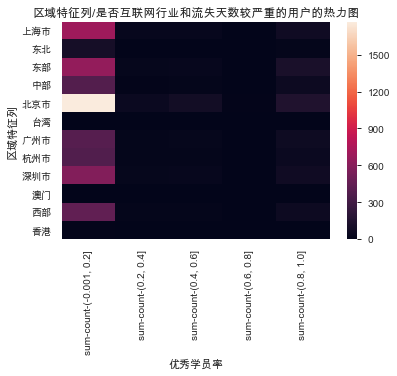

In [35]:
pivot_tbl.fillna(0,inplace=True)
sns.heatmap(pivot_tbl)
plt.xlabel('优秀学员率')
plt.ylabel('区域特征列')
plt.title('区域特征列/是否互联网行业和流失天数较严重的用户的热力图')
plt.show()

探索：

从横向看，大部分流失较严重的用户集中在优秀学员率区间[0,0.2]内；

从纵向看，北上广深杭区域里，流失最严重为北京市，其次是上海和深圳；港澳台最少；越靠近东部和南部就越多

## 五、用户学员画像

通过K-means算法，对所有学员进行聚类画像，从以下5个特征：

工作年限、是否互联网行业、年平均购买付费课程数、课平均作业提交数、优秀学员率

In [36]:
student_loc = student_data2[['工作年限','是否互联网行业','年平均购买付费课程数','课平均作业提交数','优秀学员率']]
student_loc

,工作年限,是否互联网行业,年平均购买付费课程数,课平均作业提交数,优秀学员率
0,1,是,1.65,0.00,0.00
1,3,否,3.65,4.71,0.43
2,2,是,3.45,3.33,0.17
3,0,否,1.00,1.00,0.00
4,1,是,0.68,0.00,0.00
...,...,...,...,...,...
10937,1,是,4.14,1.50,0.00
10938,1,是,2.70,1.40,0.00
10939,3,是,3.08,1.00,0.00
10940,2,是,7.23,1.27,0.00


In [37]:
## 对分类变量进行哑变量转换
student_loc = pd.get_dummies(data=student_loc, columns=
                                   ['是否互联网行业'], drop_first=True)

In [38]:
student_loc

,工作年限,年平均购买付费课程数,课平均作业提交数,优秀学员率,是否互联网行业_是
0,1,1.65,0.00,0.00,1
1,3,3.65,4.71,0.43,0
2,2,3.45,3.33,0.17,1
3,0,1.00,1.00,0.00,0
4,1,0.68,0.00,0.00,1
...,...,...,...,...,...
10937,1,4.14,1.50,0.00,1
10938,1,2.70,1.40,0.00,1
10939,3,3.08,1.00,0.00,1
10940,2,7.23,1.27,0.00,1


In [39]:
# 导入kmeans包，选择工作年限、是否互联网行业、年平均购买付费课程数、课平均作业提交数、优秀学员率
from sklearn.cluster import KMeans
km_df = student_loc[['工作年限','是否互联网行业_是','年平均购买付费课程数','课平均作业提交数','优秀学员率']]
# 标准化
from sklearn.preprocessing import StandardScaler
km_df_standardize = StandardScaler().fit_transform(km_df)
km_df_standardize = pd.DataFrame(data=km_df_standardize, columns=list(km_df.columns)) 
km_df_standardize

,工作年限,是否互联网行业_是,年平均购买付费课程数,课平均作业提交数,优秀学员率
0,-0.197290,0.880311,-0.313750,-1.072484,-0.464255
1,1.749624,-1.135962,0.511784,0.086065,1.110265
2,0.776167,0.880311,0.429231,-0.253383,0.158230
3,-1.170747,-1.135962,-0.582048,-0.826508,-0.464255
4,-0.197290,0.880311,-0.714134,-1.072484,-0.464255
...,...,...,...,...,...
10934,-0.197290,0.880311,0.714040,-0.703520,-0.464255
10935,-0.197290,0.880311,0.119656,-0.728117,-0.464255
10936,1.749624,0.880311,0.276507,-0.826508,-0.464255
10937,0.776167,0.880311,1.989490,-0.760094,-0.464255


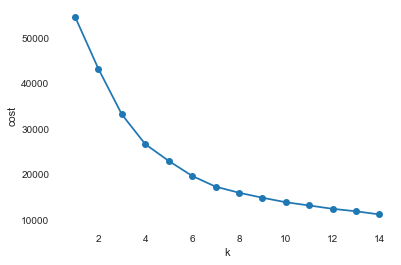

In [40]:
from scipy.spatial.distance import cdist
# 存放每次结果的误差平方和
cost = []
# 尝试不同的聚类个数
K = range(1, 15)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=99)
    kmeanModel.fit(km_df_standardize)
    cost.append(kmeanModel.inertia_) # inertia_是所有点到其所属聚类质心的平方和
# 肘部法则可视化
plt.xlabel('k')
plt.ylabel('cost')
plt.plot(K, cost, 'o-')
plt.show()

In [41]:
# 按照聚类个数为5个，训练k_means模型
km = KMeans(n_clusters=5, random_state=99)
km.fit(km_df_standardize)
# 将新标签组合到原来的数据框里面
km_label = pd.DataFrame(km.labels_, columns=['新标签'])
km_df = pd.concat([km_df_standardize, km_label],axis=1)
km_df

,工作年限,是否互联网行业_是,年平均购买付费课程数,课平均作业提交数,优秀学员率,新标签
0,-0.197290,0.880311,-0.313750,-1.072484,-0.464255,2
1,1.749624,-1.135962,0.511784,0.086065,1.110265,1
2,0.776167,0.880311,0.429231,-0.253383,0.158230,1
3,-1.170747,-1.135962,-0.582048,-0.826508,-0.464255,0
4,-0.197290,0.880311,-0.714134,-1.072484,-0.464255,2
...,...,...,...,...,...,...
10934,-0.197290,0.880311,0.714040,-0.703520,-0.464255,2
10935,-0.197290,0.880311,0.119656,-0.728117,-0.464255,2
10936,1.749624,0.880311,0.276507,-0.826508,-0.464255,1
10937,0.776167,0.880311,1.989490,-0.760094,-0.464255,4


In [42]:
## summary_df用于对聚类的分析，下一步求平均值
summary_df = km_df.copy()
summary_df[['工作年限','是否互联网行业_是','年平均购买付费课程数','课平均作业提交数','优秀学员率']] = \
student_loc[['工作年限','是否互联网行业_是','年平均购买付费课程数','课平均作业提交数','优秀学员率']]
summary_df2 = summary_df[['工作年限','是否互联网行业_是','年平均购买付费课程数','课平均作业提交数','优秀学员率', '新标签']].groupby('新标签').mean().round(2)
## 求每一个类别中的数目
summary_df2['数量'] = summary_df.groupby('新标签').size()
summary_df2

,工作年限,是否互联网行业_是,年平均购买付费课程数,课平均作业提交数,优秀学员率,数量
新标签,,,,,,
0,0.86,0.25,1.95,4.29,0.09,3482
1,2.03,0.75,2.13,3.89,0.08,2930
2,0.69,0.79,2.08,4.33,0.09,2510
3,1.02,0.50,1.87,7.99,0.56,946
4,1.40,0.60,5.89,2.74,0.09,1071
